In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer,fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7,4)

##### GaussianNB

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
df = pd.DataFrame(X,columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


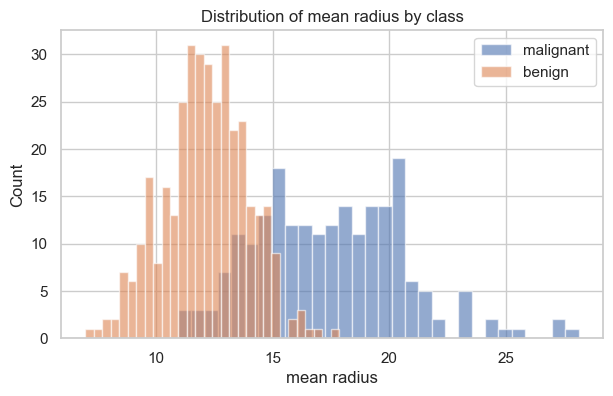

In [4]:
feature_name = 'mean radius'
feat_idx = list(data.feature_names).index(feature_name)
plt.figure()
plt.hist(X[y==0][:,feat_idx],bins=30,alpha=.6,label='malignant')
plt.hist(X[y==1][:,feat_idx],bins=30,alpha=.6,label='benign')
plt.legend()
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.title(f'Distribution of {feature_name} by class')
plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)



In [6]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9370629370629371

In [7]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[46,  7],
       [ 2, 88]])

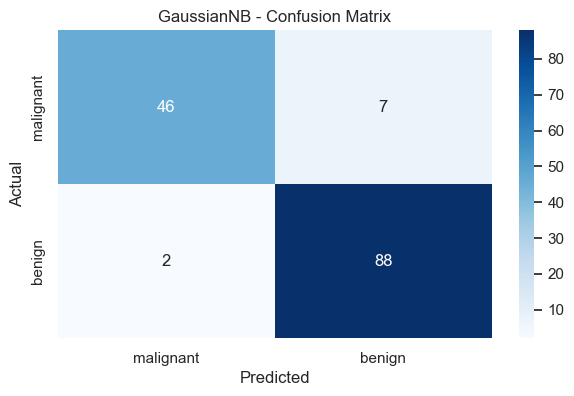

In [8]:
#plot confusion matrix
sns.heatmap(data=cm,annot=True,fmt='d',cmap='Blues',xticklabels=data.target_names,yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GaussianNB - Confusion Matrix')
plt.show()

In [9]:
#classification report
print(classification_report(y_test,y_pred,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.87      0.91        53
      benign       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



##### MultinomialNB

In [10]:
texts = [
    'I love this product',
    'This is amazing and fantastic',
    'I really like this',
    'I hate this item',
    'This is the worst thing ever',
    'Horrible and terri experience'
]
lables = [1,1,1,0,0,0] # 1 = positive, 0 = negative
df = pd.DataFrame({'text':texts,'label':lables})
df

,text,label
0,I love this product,1
1,This is amazing and fantastic,1
2,I really like this,1
3,I hate this item,0
4,This is the worst thing ever,0
5,Horrible and terri experience,0


In [11]:
# convert text to features with CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']
vectorizer.get_feature_names_out()

array(['amazing', 'and', 'ever', 'experience', 'fantastic', 'hate',
       'horrible', 'is', 'item', 'like', 'love', 'product', 'really',
       'terri', 'the', 'thing', 'this', 'worst'], dtype=object)

In [12]:
mnb = MultinomialNB()
mnb.fit(X,y)
y_pred = mnb.predict(X)
accuracy_score(y,y_pred)

1.0

In [13]:
new_text = [
    'I love it',
    'This product is horrible',
    'Fantastic experience',
    'Worse purchase ever'
]
X_new  = vectorizer.transform(new_text)
new_pred = mnb.predict(X_new)
for txt,pred in zip(new_text,new_pred):
    label_str = 'positive' if pred == 1 else 'Negative'
    print(f'{txt!r} -> {label_str}')

'I love it' -> positive
'This product is horrible' -> positive
'Fantastic experience' -> positive
'Worse purchase ever' -> Negative


##### MultonomialNB in real data

In [16]:
categories = [
    'comp.graphics',
    'rec.sport.baseball',
    'sci.med'
]

data = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)


In [21]:
df = pd.DataFrame({
    'text':data.data,
    'label':data.target
})
df.head()

,text,label
0,"\nThe FDA, I believe. Rules say no blood or b...",2
1,,2
2,It would be nice to think that individuals can...,2
3,"Ok all you trivia buffs, I have a good one for...",1
4,"Please , I need the starting address (pointer)...",0


In [24]:
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['label'],test_size=.25,random_state=42)

In [27]:
vectorizer = CountVectorizer(stop_words='english',max_features=3000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [31]:
mnb = MultinomialNB()
mnb.fit(X_train_counts,y_train)
y_pred = mnb.predict(X_test_counts)
accuracy_score(y_test,y_pred)

0.9166666666666666

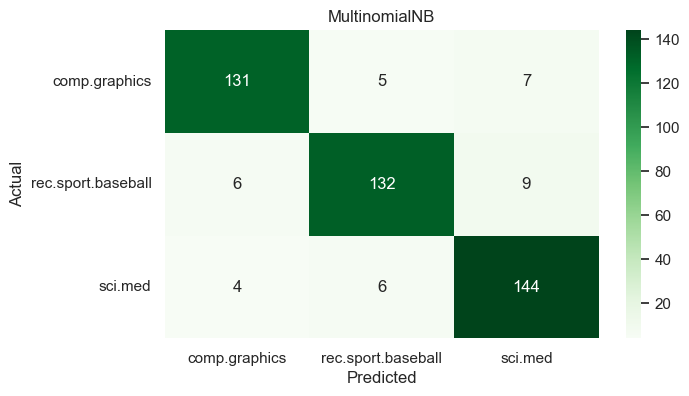

In [34]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens',fmt='d',xticklabels=data.target_names,yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MultinomialNB')
plt.show()

In [35]:
print(classification_report(y_test,y_pred,target_names=data.target_names))

                    precision    recall  f1-score   support

     comp.graphics       0.93      0.92      0.92       143
rec.sport.baseball       0.92      0.90      0.91       147
           sci.med       0.90      0.94      0.92       154

          accuracy                           0.92       444
         macro avg       0.92      0.92      0.92       444
      weighted avg       0.92      0.92      0.92       444

